<a href="https://colab.research.google.com/github/hniu-tamu/ds_energy/blob/main/time_series/2_Time_Series_Model_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series and forecasting models


### Time series as stochastic processes
* $X(t)$ or $X_t$, $t =1, 2, \dots$ (random variables)
* *Mean*. $\mu(t) = E [X(t)] $
* *Variance*. $\sigma^2(t) = {\rm Var}[X(t)]$
* *Autocovariance*. $\gamma(t_1, t_2) = E\{[X(t_1) - \mu(t_1)][X(t_2) - \mu(t_2)]\}$
* A time series is called (weakly) stationary if its mean is a constant and autocovariance function depends only on the lag $t_2-t_1$.
* It follows its variance is also a constant (corresponding to autocovariance for lag 0).  
* *Autocorrelation* at lag $\tau$: $\rho(\tau) = {\rm corr}(X_t, X_{t+\tau})$
* Sample mean, sample autocovariance, sample autorrelation: \\
Use sample average to replace the expetation in the definition

### White noise processes
* $Z_1, Z_2, \dots$, mutually independent and identically distributed
* mean 0, variance $\sigma_Z^2$
* autocorrelation at lag $k$:
$\rho(k) = 1$ if $k=0$, $\rho(k)=0$ otherwise
* sometimes weaker assumption is used: \\
$Z_1, Z_2, \dots$, mutually uncorrelated
* it is the simplest stationary process
* it is used as building blocks for more complicated models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample
import warnings
warnings.filterwarnings('ignore')

**Example**: Generate a white noise process and draw a time series plot of the process.

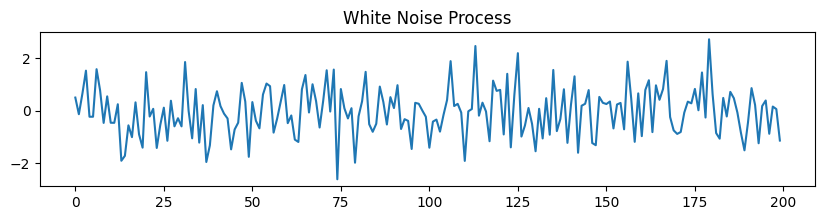

In [3]:
# seed random number generator
np.random.seed(42)

# create white noise array
white_noise_array = np.random.normal(loc=0, scale=1, size= 200)

# draw a time series plot
plt.figure(figsize=(10,2))
plt.plot(white_noise_array)
plt.title('White Noise Process')
plt.show()


(array([ 1.,  7., 23., 32., 39., 51., 27., 13.,  4.,  3.]),
 array([-2.6197451 , -2.08575368, -1.55176225, -1.01777082, -0.4837794 ,
         0.05021203,  0.58420346,  1.11819489,  1.65218631,  2.18617774,
         2.72016917]),
 <BarContainer object of 10 artists>)

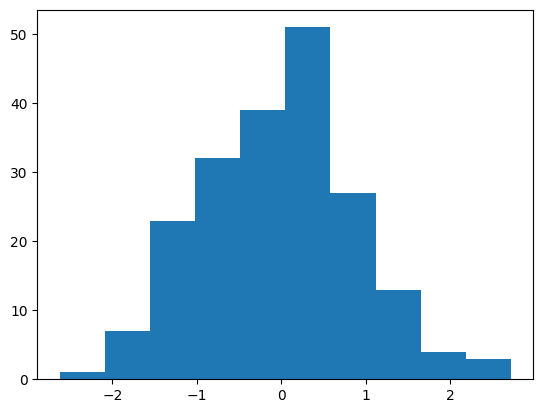

In [5]:
plt.hist(white_noise_array)

In [6]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [7]:
abs(sigma - np.std(s, ddof=1))

8.296814265230934e-05

### Random walks
* $\{Z_t, t= 1, 2, \dots \}$ is a white noise process with mean $\mu$ and variance $\sigma_Z^2$
* $\{X_t, t=1, 2, \dots \}$ is a random walk if \\
$$X_t = X_{t-1} + Z_t$$
* the process is customarily started at zero when $t=0$, so that $X_1 = Z_1$
* $X_t = \sum_{i=1}^t Z_i$
* $E(X_t) = t\mu$, ${\rm Var}(X_t) = t\sigma_Z^2$, both changing with $t$
* a random walk is non-stationary
* the first difference of a random walk is a white noise, which is stationary \\
$$X_t - X_{t-1} = Z_t$$

**Example**: Generate a random walk process and draw a time series plot. Compare with the time series plot of the first difference of random walk.

Two methods for generating random walk process are presented.
1. Use a for loop, according to the model equation of the white noise process.
2. Take the cumulative sum of the white noise process. (The looping operation is implicit.)

In [8]:
# Method 1: Generate a random walk process according to the definition X_t = X_{t-1} + Z_t using a for loop
## seed random generator
np.random.seed(42)

## create random walk process
random_walk_array = np.zeros(200)
random_walk_array[0] = np.random.normal()
for i in range(1, 200):
  random_walk_array[i] = random_walk_array[i-1] + np.random.normal()


In [9]:
# Method 2: An easier way to generate a random walk process by taking cumulative sum of the white noise
# We use white_noise_array enerated in the previous example. (We need to run the code chunk for generating the white noise before running this trunk.)
random_walk_array = np.cumsum(white_noise_array)

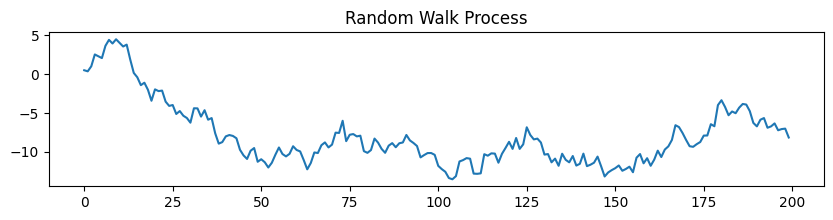

In [10]:
# Visualization
plt.figure(figsize=(10,2))
plt.plot(random_walk_array)
plt.title('Random Walk Process')
plt.show()

### Moving Average processes
* $\{Z_t, t=1, 2, \dots\}$ is a white noise process
* $\{X_t, t=1, 2, \dots\}$ is a moving average process of order $q$, MA($q$), if
$$X_t = \beta_0 Z_t  + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-q}$$
where $\beta_i$ are constants.
* Usually $Z$s are scaled so that $\beta_0 =1$.
* $E(X_t) =0$
* ${\rm Var} (X_t) = \sigma_Z^2 \sum_{i=1}^q \beta_i^2$.
* Autocorrelation function (ACF)
$$ \rho(k) = {\rm corr} (X_t, X_{t+k}) = \begin{cases} 0  & k >q \\
 \sum_{i=1}^{q-k} \beta_i\beta_{i+1}/\sum_{i=1}^q \beta_i^2 & k =0, \dots, q\\
\rho(-k) & k<0 \end{cases} $$
* MA($q$) is a stationary process (because the above quantities do not depend on $t$).
* The autocorrelation "cuts off" at lag $q$. -- *This property can be used to identify the order of a MA process.*
* Sample autocorrelation will not "cuts off" exactly becaues of randomness

**Example**: Generate a MA($q$) process with $q = 2$ and draw a time series plot of the process.

Two methods for generating a MA($2$) process are presented.
1. The MA($2$) process is generated according to its defining equation
$$
X_t = \beta_0Z_t + \beta_1 Z_{t-1} +\beta_2 Z_{t-2}
$$
where $\beta_0 = 1, \beta_1 = 0.8$ and $\beta_3 = 0.5$.
2. The MA($2$) process is generated using `arma_generate_sample` function in the module `arma_process`. The definition of ARMA model and the relation between ARMA and MA model will be introduced later.


In [11]:
# Method 1: Generate a MA(2) process according to its model equation.
## seed random generator
np.random.seed(42)
##  create ma(2) array
order_ma = 2 # order
ma_coef = [1.0, 0.8, 0.5] # MA coefficient [beta_0, beta_1, beta_2]
## create random noise array
white_noise = np.random.normal(size=1000)
## initialization
ma_array = np.zeros(1000)
ma_array[0:2] = [0,0]
## assignment
for i in range(2, 1000):
    ma_array[i] = ma_coef[0] * white_noise[i] + ma_coef[1] * white_noise[i-1] + ma_coef[2] * white_noise[i-2]

In [12]:
# Method 2: Generate a MA(2) process using arma_generate_sample function

from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(42)
ma_coef = [1.0,0.8,0.5]
ma_array = arma_generate_sample(ar = [1.0],ma = ma_coef,nsample =  1000)

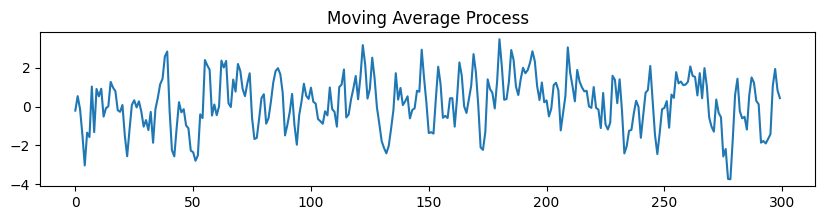

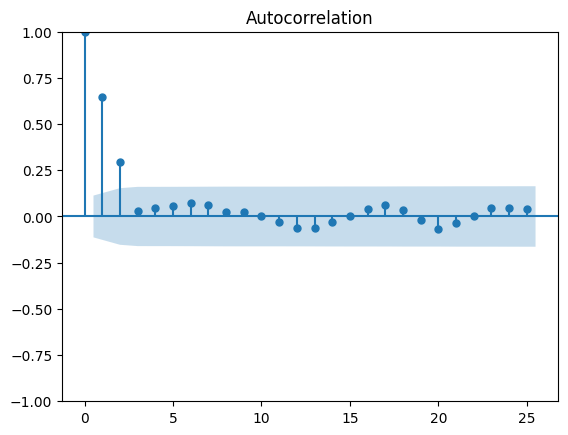

In [13]:
#  Visualization
ma_array_300 = ma_array[700:1000]
plt.figure(figsize=(10,2))
plt.plot(ma_array_300)
plt.title('Moving Average Process')
plt.show()
## Check the ACF plot
plot_acf(pd.DataFrame(ma_array_300))
plt.show()

The first two autocorrelation coefficients are significantly different from zero, suggesting an MA(2) process.

### Autoregressive processes
* $\{Z_t, t=1, 2, \dots\}$ is a white noise process
* $\{X_t, t=1, 2, \dots\}$ is an autoregressive process of order $p$, AR($p$), if
$$X_t = \alpha_1 X_{t-1} + \dots \alpha_p X_{t-p} + Z_{t}$$
where $\alpha_i$ are constants.
* This is link a multiple regression model, but $X_t$ is regressed on past values of $X_t$. -- This explains the prefix "auto".
* $E(X_t)=0$
* It is stationary under some conditions on the coefficients $\alpha_i$s.


**Example**: Generate a AR(1) process with multiple choices of $\alpha$ and draw a time series plot of the process.

Two methods to generate AR($1$) process are presented.
1. The AR($1$) process is generated according to the definition such that
$$
X_t = Z_t + \alpha X_{t-1}
$$
2. The AR($1$) process is generated using `arma_generate_sample` function in the module `arma_process`.

In [14]:
# Method 1: Generate the AR(1) process according to its definition
def Autoregressive(alpha, seed=42):
   # seed random generator
    np.random.seed(seed)
   # create AR(1) array
    ar = np.zeros(100)
    ar[0] = np.random.normal(loc=0, scale=1.0/(1-alpha**2), size=1)
    ## assignment
    for i in range(1, 100):
        ar[i] = alpha * ar[i-1] + np.random.normal(size=1)
    return ar

auto_reg1 = Autoregressive(0.8)
auto_reg2 = Autoregressive(0.3)
auto_reg3 = Autoregressive(-0.8)

In [15]:
# Method 2: Generate the AR(1) using the arma_generate_sample function

from statsmodels.tsa.arima_process import arma_generate_sample

ar_coef = [1.0, -0.8] # Note we need to add a negative sign in front of the AR coefficient.
ma_coef = [1.0]
auto_reg = arma_generate_sample(ar = ar_coef, ma = ma_coef, nsample =  100)

# If we need to repeat the process for different values of the AR coefficient, it is better to write a python function.

def Autoregressive(alpha, seed = 42):
  np.random.seed(seed)
  ar_coef = [1.0, -1.0*alpha]
  ma_coef = [1.0]
  ar_array = arma_generate_sample(ar = ar_coef,ma = ma_coef,nsample =  100)
  return ar_array

auto_reg1 = Autoregressive(0.8)
auto_reg2 = Autoregressive(0.3)
auto_reg3 = Autoregressive(-0.8)

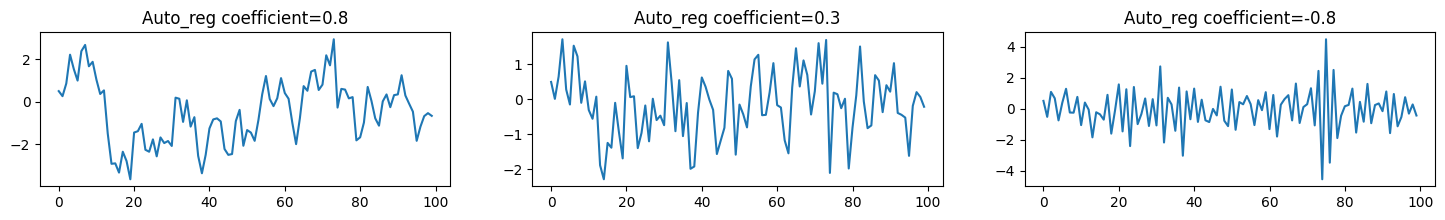

In [16]:
# Visualization of the time series

plt.figure(figsize=(18,2))
plt.subplot(131)
plt.plot(auto_reg1)
plt.title('Auto_reg coefficient=0.8')
plt.subplot(132)
plt.plot(auto_reg2)
plt.title('Auto_reg coefficient=0.3')
plt.subplot(133)
plt.plot(auto_reg3)
plt.title('Auto_reg coefficient=-0.8')
plt.show()

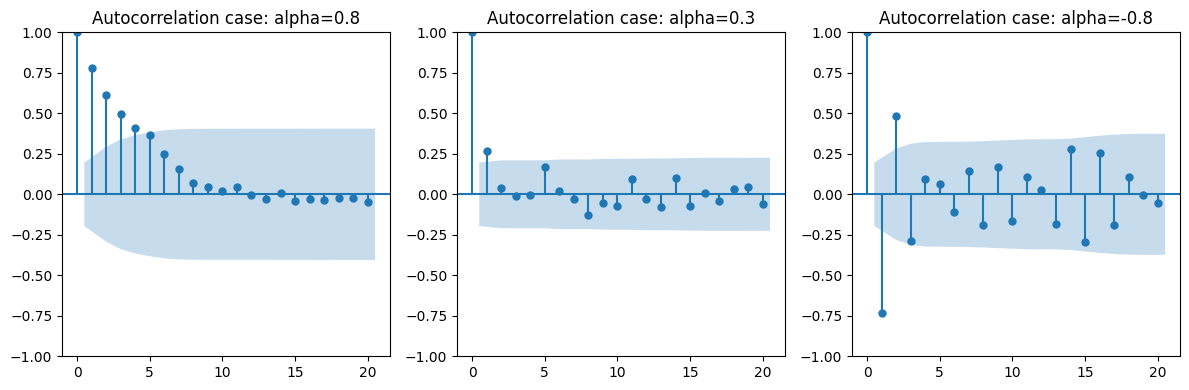

In [17]:
# Plots of sample autocorrelation function. We need to use the Python module matplotlib.gridspect to arrange multiplots.
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout = True, figsize = (12, 4))
gs = gridspec.GridSpec(1, 3)
ax = fig.add_subplot(gs[0,0])
plot_acf(pd.DataFrame(auto_reg1), ax=ax, title='Autocorrelation case: alpha=0.8')
ax = fig.add_subplot(gs[0,1])
plot_acf(pd.DataFrame(auto_reg2), ax=ax, title='Autocorrelation case: alpha=0.3')
ax = fig.add_subplot(gs[0,2])
plot_acf(pd.DataFrame(auto_reg3), ax=ax, title='Autocorrelation case: alpha=-0.8')
plt.show()


### Some theory of AR(1) processes
* $X_t = \alpha X_{t-1} + Z_t$
* Backward shift operator $B$: $B X_t = X_{t-1}$.
* AR(1) model can be rewritten as $(1-\alpha B) X_t = Z_t$
* MA($\infty$) representation
$$ \begin{eqnarray*} X_t &=& Z_t/ (1-\alpha B) \\
&=& (1 + \alpha B + \alpha^2 B^2 + \dots) Z_t\\
&=& Z_t + \alpha Z_{t-1} + \alpha^2 Z_{t-2} + \dots \end{eqnarray*} $$
* This representation can be used to derive the autocorrelation function
$$\rho(k) = {\rm corr}(X_t, X_{t+k}) = \alpha^k, \quad k = 0, 1, 2, \dots $$
* Need $|\alpha| < 1 $ for the process to be stationary.
* If $\alpha$ is close to $0$, the autocorrelaton decays quickly to 0.
* If $\alpha$ is negative, the autocorrelaton alternates between positive and negative values.

### Indentify the order of an AR process by inspecting the Partial Autocorrelation (PACF) plot.

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

So what is the formula for PACF mathematically?

Partial autocorrelation of lag k of the series $\{X_t\} $ is the coefficient $\alpha_k$ in the following autoregression equation:

$$X_t = \alpha_0 + \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + \dots \alpha_k X_{t-k} + Z_t$$

How to find the number of AR terms?

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.




### Mixed ARMA models
* A mixed autoregressive/moving-average process containing $p$ AR terms and $q$ MA terms is called an ARMA process of order $(p,q)$.
* Its equation
$$ X_t = \alpha_1 X_{t-1} + \dots + \alpha_p X_{t-p} + Z_t + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-q}$$
* Define two polynomials
$$
\begin{eqnarray*}
\phi(B) & = & 1 -\alpha_1 B - \dots - \alpha_p B^p\\
\theta(B) & = & 1 + \beta_1 B + \dots + \beta_q B^q
\end{eqnarray*}
$$
* If $B$ is the backward shift operator, ARMA model can be written as
$$ \phi(B) X_t = \theta(B) Z_t
$$
* The process is stationary under certain conditions on the coefficients.
* Condition: The (complex) roots of $\phi(B)$ =0 and $\theta(B) = 0$ lie outside the unit circle.


**Example**: Generate a sample path for the following ARMA(2,1) process and draw a time series plot.
$$
X_t = \frac{5}{6}X_{t-1}-\frac{1}{6}X_{t-2}+Z_t + \frac{1}{2}Z_{t-1}
$$
The equation can also be written as
$$
X_t - \frac{5}{6}X_{t-1} + \frac{1}{6}X_{t-2} = Z_t + \frac{1}{2}Z_{t-1}
$$


In [18]:
from statsmodels.tsa.arima_process import arma_generate_sample

# seed random generator
np.random.seed(192)

# Generate arma(2,1) array using Python arma_generate_sample function
ar_coef = [1, -5/6, 1/6] # The coefficient for autoregressive lag polynomial phi(B), including zero lag
ma_coef = [1, 1/2] # The coefficient for moving-average lag polynomial theta(B), including zero lag
my_arma_array = arma_generate_sample(ar_coef, ma_coef, 250) #sample size = 250

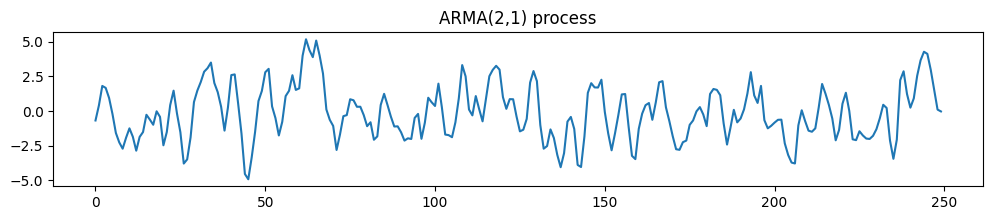

In [19]:
# Visualization
plt.figure(figsize=(12,2))
plt.plot(my_arma_array)
plt.title('ARMA(2,1) process')
plt.show()

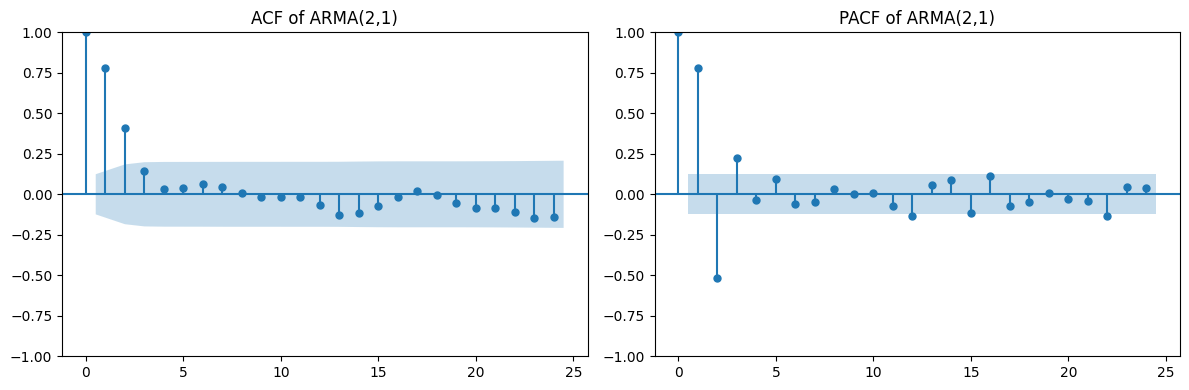

In [20]:
## ACF and PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout = True, figsize = (12, 4))
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0,0])
plot_acf(my_arma_array,title='ACF of ARMA(2,1)', ax = ax)
ax = fig.add_subplot(gs[0,1])
plot_pacf(my_arma_array,title='PACF of ARMA(2,1)',ax = ax)
plt.show()

We observe there are some significant ACF coefficients and PACF coefficients.

### Why ARMA models?
* A stationary time series may often be adequately modelling by an ARMA model involving fewer parameters than a pure MA or AR process by itself.
* This is calle the **Principle of Parsimony.**
* We want to find a model with as few parameters as possible, but which gives an adequate representation of the data at hand.

### Integrated ARMA (ARIMA) model
* In practice, many time series are non-stationary.
* Differencing the series can remove the non-stationary sources of variation.
* First difference: $\Delta X_t = X_t - X_{t-1} = (1-B) X_t$
* Second difference: $\Delta^2 X_t = \Delta X_t - \Delta X_{t-1} = (1-B^2) X_t$
* $d$-th difference: $W_t = \Delta^d X_t = (1-B)^d X_t$
* $W_t$ is ARMA$(p,q)$:
$$ W_t = \alpha_1 W_{t-1} + \dots + \alpha_p W_{t-p} + Z_t + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-1}$$
* $X_t$ is called an ARIMA process of order $(p,d,q)$ -- autoregressive integrated moving average
* $X_t$ is not stationary. Its $d$-th difference $W_t$ is stationary.
* First differencing is often found to be adequate in pratice.
* The random walk is ARIMA (0,1,0). --It is white noise after taking first diference.

**Example**: Generate an ARIMA(2,1,1) process based on `my_arma_array` (ARMA(2,1)) created in the previous example and draw the time series plot of the process.

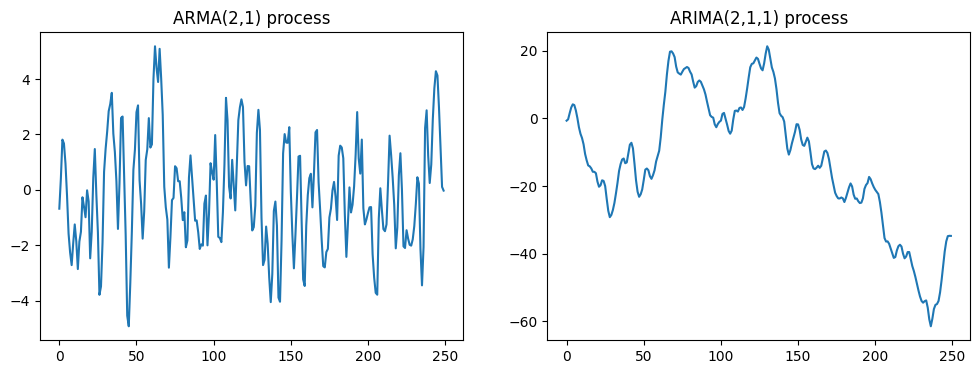

In [21]:
# Generate a sample path for an ARIMA(2,1,1) process using the sample path of an ARMA(2,1) process
# Use cumsum function in numpy
my_arima_array = np.cumsum(my_arma_array)

# visualization
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(my_arma_array)
plt.title('ARMA(2,1) process')
plt.subplot(122)
plt.plot(my_arima_array)
plt.title('ARIMA(2,1,1) process')
plt.show()

We observe that ARMA(2,1) is stationary; its path varies around its mean. ARIMA(2,1,1) is not stationary; its path shows a trending behavior (called stochastic trend). We can use the KPSS and ADF tests to check the stationarity of a time series.

### ADF test
ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

 * Null Hypothesis: The series has a unit root, or the series is non-stationary.

* Alternate Hypothesis: The series has no unit root, or the series is stationary.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [22]:
# ADF test for checking the stationarity of a time series.
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [23]:
adf_test(my_arima_array)

Results of Dickey-Fuller Test:
Test Statistic                  -1.528756
p-value                          0.519241
#Lags Used                       3.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


p-value is 0.52, which much more than 5% confidence level. The null hypothesis can not be rejected. Hence the series is non-stationary.

### KPSS test
KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are different from that of the ADF test.
 * Null Hypothesis: The process is trend stationary.
 * Alternate Hypothesis: The series has a unit root (series is not stationary).

In [24]:
# KPSS test for checking the stationarity of a time series.
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [25]:
kpss_test(my_arima_array)

Results of KPSS Test:
Test Statistic            1.107843
p-value                   0.010000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


p-value is 0.01, which less than 5% confidence level. The null hypothesis can be rejected. Hence the series is non-stationary.

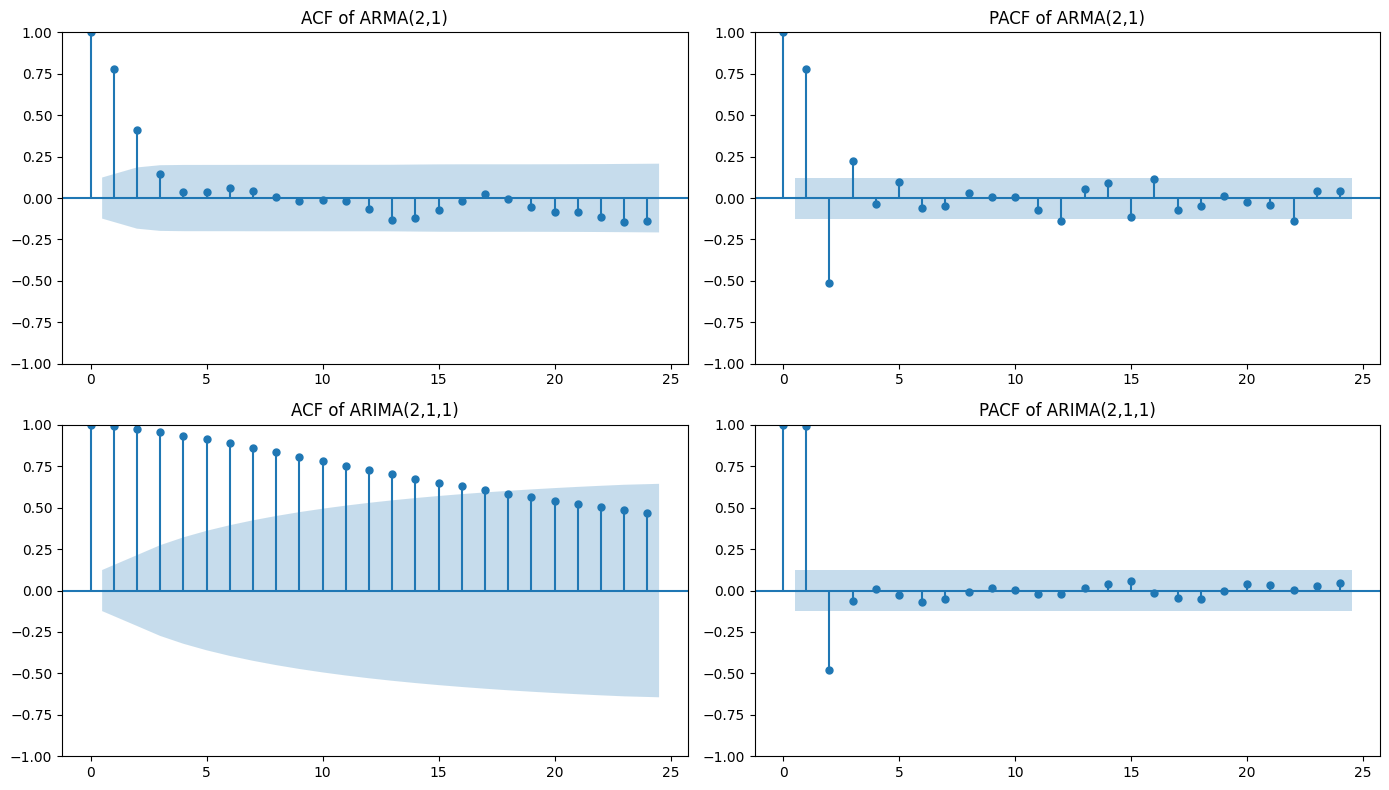

In [26]:
## ACF and PACF plots

import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout = True, figsize = (14, 8))
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0,0])
plot_acf(my_arma_array,title='ACF of ARMA(2,1)', ax = ax)
ax = fig.add_subplot(gs[0,1])
plot_pacf(pd.DataFrame(my_arma_array),title='PACF of ARMA(2,1)',ax = ax)
ax = fig.add_subplot(gs[1,0])
plot_acf(my_arima_array,title='ACF of ARIMA(2,1,1)',ax = ax)
ax = fig.add_subplot(gs[1,1])
plot_pacf(my_arima_array,title='PACF of ARIMA(2,1,1)',ax = ax)
plt.show()

The ACF of the ARIMA(2,1,1) process decays very slowly, suggesting it is an integrated process (non-stationary).

### Fitting the ARIMA(p,d,q) model
Once you have determined the orders $p,d,q$ in ARIMA model (we will discuss in the next section), you can fit the ARIMA model.

**Example**: Fit a ARIMA model to the `arima_array`(ARIMA(2,1,1)) data that we created in the previous example using `ARIMA()` function.

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Split sample. Use the first 200 data points in my_arima_array as training data and the last 50 as test data.
my_arima_array_train = my_arima_array[:200]
my_arima_array_test = my_arima_array[200:]

# fit the ARIMA model
model = ARIMA(my_arima_array_train,order=(4, 1, 3))
model_fit = model.fit()

# print the fitting result
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -285.671
Date:                Wed, 17 Jan 2024   AIC                            587.343
Time:                        01:27:31   BIC                            613.689
Sample:                             0   HQIC                           598.006
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7892      0.163     10.995      0.000       1.470       2.108
ar.L2         -2.1035      0.262     -8.021      0.000      -2.618      -1.590
ar.L3          1.2141      0.258      4.704      0.0

### Diagnostics
After fitting the ARIMA model to data, we can do the following checks on the residuals to see if the fitted model is adequate.

1. Plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

2. Series correlation. Plot acf and pacf to ensure there is no significant coefficient.

**Example**: Diagnose the model fitting result. The residuals can be obtained by .resid function.

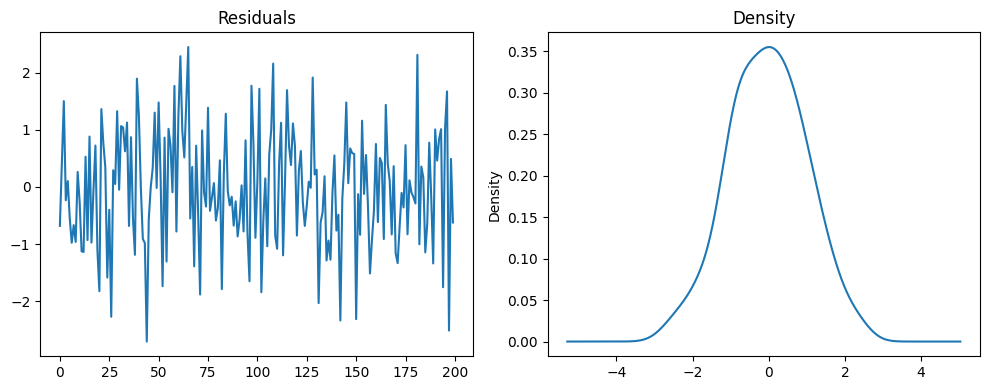

In [30]:
residuals = pd.DataFrame(model_fit.resid)

# Generate the residual plot
fig = plt.figure(tight_layout = True, figsize = (10, 4))
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0,0])
residuals.plot(title="Residuals",ax=ax, legend=False)
ax = fig.add_subplot(gs[0,1])
residuals.plot(kind='kde',title='Density',ax=ax,legend = False)
plt.show()

We observe there is no observious pattern in the residuals plot and the center of the density of residuals lies around zero.

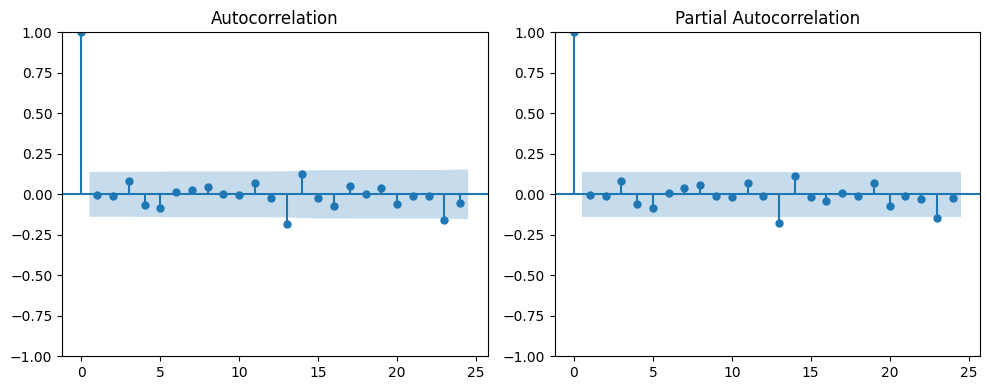

In [31]:
# Generate acf and pacf plot
fig = plt.figure(tight_layout = True, figsize = (10, 4))
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0,0])
plot_acf(residuals,ax = ax)
ax = fig.add_subplot(gs[0,1])
plot_pacf(residuals,ax = ax)
plt.show()

The autocorrelation and partial autocorrelation plot suggest that there is no significant coefficient. Therefore, the model fitted to the data is adequate.

### ARIMA forecasting
With the determined orders $p,d,q$ and the fitting ARIMA model, we can then forecast the future.

**Example**: Forecast the future trend based on the `model_fit` we derived in the previous example and check whether the forecasting is valid by comparing the forecasts and the `arima_array_test`. The function `.forecast` will be used and it will return three arrays:

1. forecast array: array of out of sample forecasts.
2. stderr array: array of the standard errorof the forecasts.  
3. conf_int array: 2d array of the confidence interval for the forecasts.

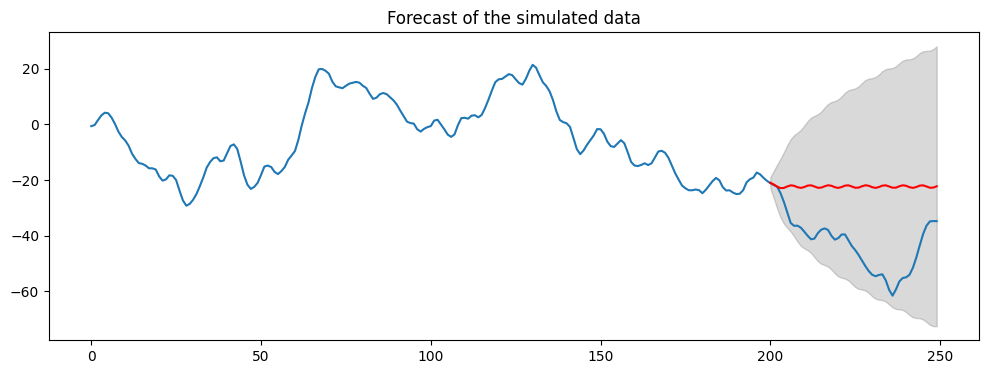

In [34]:
n_pred = 50 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast
forecast_results = model_fit.get_forecast(steps=n_pred,alpha=0.05) # alpha: confidence level
pred_array, se_array, CI_array = forecast_results.predicted_mean, forecast_results.se_mean, forecast_results.conf_int(alpha=0.05)

pred_array_index = range(200,250)

plt.figure(figsize=(12,4))
plt.plot(my_arima_array)
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .15 )
plt.title('Forecast of the simulated data')
plt.show()


### The Box-Jenkins approach for time series forecasting
* (1) *Model identification* \\
Examine the data to see which member of the class of ARIMA processes appears to be most appropriate. Difference the data. Check the autocorrelation and partical autocorrelation.
* (2) *Estimation* \\
Estimate the parameters of the chosen model.
* (3) *Diagnostic checking* \\
Examine the residuals from the fitted model to see if there is evidence of non-randomness.
* (4) *Consideration of alternative models if necessary*

### Automatic determination of the orders of an ARIMA model
The manually iterative fitting procedure is an art and requires experience. The function below searches over multiple combinations of $p,d,q$ parameters and choose the optimal ARIMA model that has the least value of the AIC criterion.

In [35]:
# Find the optimal ARIMA model that has the least value of the AIC criterion.
# Return: (p, d, q) that minimizes AIC criterion.

import itertools
def arima_order(data, order=10, verbose=True):
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, "AIC=", fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, rmodel_arima_fit.aic})
    except:
      continue
  return min_order

In [36]:
arima_order(my_arima_array_train, order=5)

(0, 0, 0) AIC= 1616.0937981503957
(0, 0, 1) AIC= 1351.7122968441627
(0, 0, 2) AIC= 1118.9572463374984
(0, 0, 3) AIC= 939.7223655138127
(0, 0, 4) AIC= 828.2657655383663
(0, 1, 0) AIC= 830.2357556766061
(0, 1, 1) AIC= 659.4516105057235
(0, 1, 2) AIC= 601.7217817979588
(0, 1, 3) AIC= 591.0140029360019
(0, 1, 4) AIC= 588.2576430230392
(0, 2, 0) AIC= 665.7511798230336
(0, 2, 1) AIC= 625.404573861054
(0, 2, 2) AIC= 626.3222327976957
(0, 2, 3) AIC= 604.7839789682197
(0, 2, 4) AIC= 593.8479870120447
(0, 3, 0) AIC= 718.4880936769664
(0, 3, 1) AIC= 670.6784092749028
(0, 3, 2) AIC= 629.7158353371385
(0, 3, 3) AIC= 630.8503920792367
(0, 3, 4) AIC= 614.2088610005612
(0, 4, 0) AIC= 866.3257275304003
(0, 4, 1) AIC= 723.1298671066984
(0, 4, 2) AIC= 682.0630838399504
(0, 4, 3) AIC= 640.0011693532904
(0, 4, 4) AIC= 641.435370227697
(1, 0, 0) AIC= 840.8612286810715
(1, 0, 1) AIC= 669.7919395451736
(1, 0, 2) AIC= 611.3263041008374
(1, 0, 3) AIC= 599.7761586835768
(1, 0, 4) AIC= 596.0964582306226
(1, 1, 0)

(3, 1, 4)